<h1 style="text-align:center; color:Blue">EEG Dataset for Prediction of Emotions</h1>

<h2 style="text-align:center; color:Blue;">Import Packages</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
%matplotlib inline
import json
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

#import os
#os.listdir('../input')


In [2]:
#brainwave_df = pd.read_csv('emotions.csv')
brainwave_df = pd.read_csv("../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv")

<h2 style="text-align:center; color:Blue;">First few rows of data</h2>

In [3]:
brainwave_df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


<h2 style="text-align:center; color:Blue;">Last few rows of Data</h2>

In [4]:
brainwave_df.tail()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
2127,32.400,32.2,32.2,30.80,23.4,1.64,-2.03,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.2,47.2,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.20,1.09,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.8,-59.8,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.08,6.90,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.5,-10.5,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.46,1.58,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.0,-271.0,552.00,NEGATIVE
2131,27.000,32.0,31.8,25.00,28.9,4.99,1.95,6.210,3.490,-3.51,...,1.95,1.810,1.810,1.95,110.0,-6.71,22.8,22.8,-6.71,NEUTRAL


<h2 style="text-align:center; color:Blue;">Dimensions of Data

In [5]:
brainwave_df.shape

(2132, 2549)

<h2 style="text-align:center; color:Blue;">Statistics on Data</h2>

In [6]:
brainwave_df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


<h2 style="text-align:center; color:Blue;">Class Distribution</h2>

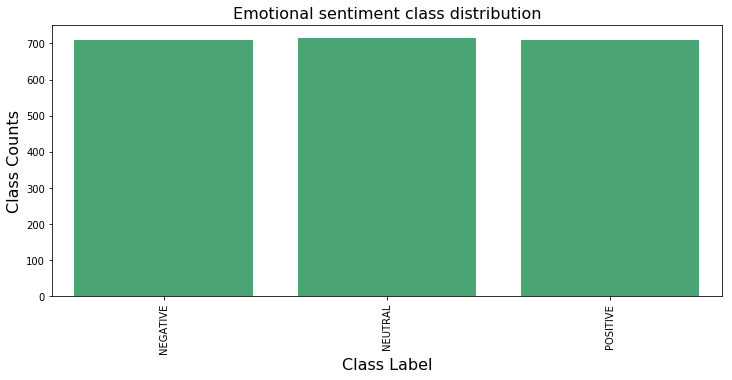

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x=brainwave_df.label, color='mediumseagreen')
plt.title('Emotional sentiment class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

<h2 style="text-align:center; color:Blue;">Split Class and Attributes</h2>


In [8]:
label_df = brainwave_df['label']
brainwave_df.drop('label', axis = 1, inplace=True)

<h2 style="text-align:center; color:Blue;">Correlation Between Attributes</h2>


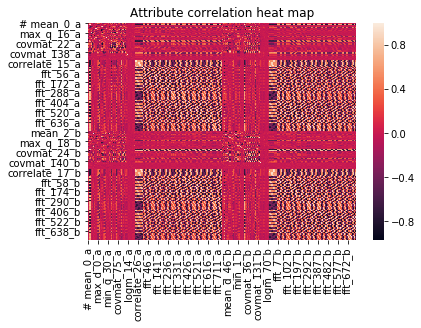

In [9]:
#Finding out correlation between the attributs
correlations = brainwave_df.corr(method='pearson')
#heatmap representation for the correlation
sns.heatmap(correlations)
plt.title('Attribute correlation heat map')
plt.show()

<h2 style="text-align:center; color:Blue;">Nearest Neighbour Classifier</h2>

Accuracy in percentage for 5-NN Niebhor :  93.20843091334895 %


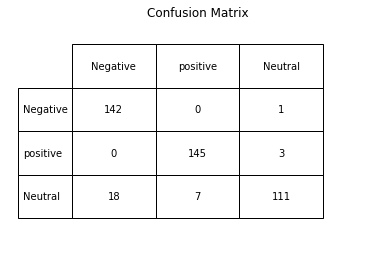

In [10]:
#Spliting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(brainwave_df, label_df, test_size=0.2, random_state=42)
sc = StandardScaler()
#data pre-processing 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# finding 5 nearest neighbor
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
NN_Acc = accuracy_score(y_test, y_predict)*100
NN_rep = report(y_test, y_predict,output_dict=True)
print("Accuracy in percentage for 5-NN Niebhor : ",NN_Acc,"%")
pl.title('Confusion Matrix')
lbl = ('Negative','positive','Neutral')
tb = pl.table(cellText=cm, loc=(0,0), cellLoc='center',rowLabels=lbl,colLabels=lbl)
tc = tb.properties()['child_artists']
for cell in tc: 
    cell.set_height(1/5)
    cell.set_width(1/4)
pl.axis('off')
pl.show()

<h2 style="text-align:center; color:Blue">Random Forest Classifier With Cross Validation</h2>

Accuracy for RandomForest :  97.09083200615929 %


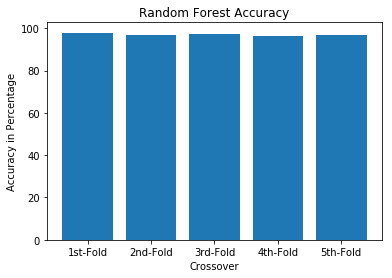

CPU times: user 2.21 s, sys: 112 ms, total: 2.32 s
Wall time: 2.32 s


In [11]:
%%time
#Random forest for classification and Cross Validation for accuracy
pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest, brainwave_df, label_df, cv=5,scoring='accuracy')
Rf_Acc = scores.mean()*100
print('Accuracy for RandomForest : ',Rf_Acc,'%')
Folds = ('1st-Fold', '2nd-Fold', '3rd-Fold', '4th-Fold', '5th-Fold')
plt.bar(Folds,scores*100)
plt.title('Random Forest Accuracy')
plt.xlabel('Crossover')
plt.ylabel('Accuracy in Percentage')
plt.show()

<h2 style="text-align:center; color:Blue;">Logistic Regression Classifier With Cross Validation</h2>

Accuracy for Logistic Regression:  93.29271455479696 %


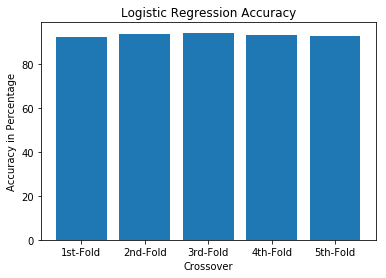

CPU times: user 1min 42s, sys: 528 ms, total: 1min 42s
Wall time: 1min 42s


In [12]:
%%time
#Logistic regression with data pre-processing and cross validation
pl_log_reg = Pipeline(steps=[('scaler',StandardScaler()),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg, brainwave_df, label_df, cv=5,scoring='accuracy')
Lr_Acc = scores.mean()*100
print('Accuracy for Logistic Regression: ',Lr_Acc,'%')
Folds = ('1st-Fold', '2nd-Fold', '3rd-Fold', '4th-Fold', '5th-Fold')
plt.bar(Folds,scores*100)
plt.title('Logistic Regression Accuracy')
plt.xlabel('Crossover')
plt.ylabel('Accuracy in Percentage')
plt.show()

<h2 style="text-align:center; color:Blue">Visualize Data using Principal Component Analysis</h2>


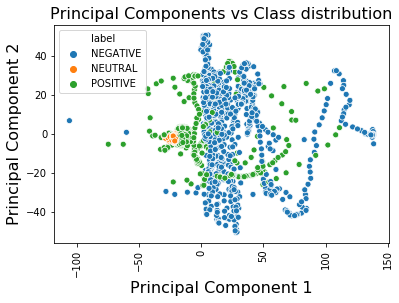

In [13]:
#PCA with 2 component
scaled_df = sc.fit_transform(brainwave_df)
pca = PCA(n_components = 2)
pca_vectors = pca.fit_transform(scaled_df)
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');


<h2 style="text-align:center; color:Blue;">Support Vector Machine Classifier With dimension reduced to 10</h2>

Accuracy for SVM with Fetures reduced to 10 :  85.27185897493668 %


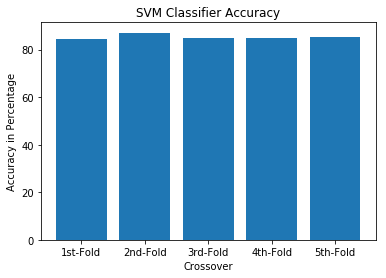

CPU times: user 3.17 s, sys: 636 ms, total: 3.81 s
Wall time: 2.62 s


In [14]:
%%time
#SVM with 10 PCA components
pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                         ('pca', PCA(n_components = 10)),
                             ('pl_svm', SVC())])
scores = cross_val_score(pl_svm, brainwave_df, label_df, cv=5,scoring='accuracy')
SVM10_Acc = scores.mean()*100
print('Accuracy for SVM with Fetures reduced to 10 : ',SVM10_Acc,'%')
Folds = ('1st-Fold', '2nd-Fold', '3rd-Fold', '4th-Fold', '5th-Fold')
plt.bar(Folds,scores*100)
plt.title('SVM Classifier Accuracy')
plt.xlabel('Crossover')
plt.ylabel('Accuracy in Percentage')
plt.show()

<h2 style="text-align:center; color:Blue;">Support Vector Machine Classifier With dimension reduced to 2</h2>

Accuracy for SVM with Fetures reduced to 2 :  91.04027691051908 %


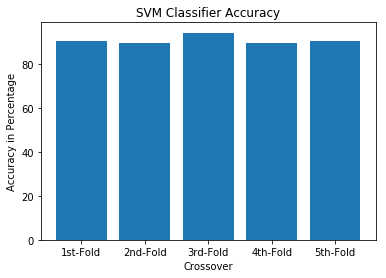

CPU times: user 2.71 s, sys: 620 ms, total: 3.33 s
Wall time: 2.26 s


In [15]:
%%time
#SVM with 2 PCA components
pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                         ('pca', PCA(n_components = 2)),
                             ('pl_svm', SVC())])
scores = cross_val_score(pl_svm, brainwave_df, label_df, cv=5,scoring='accuracy')
SVM2_Acc = scores.mean()*100
print('Accuracy for SVM with Fetures reduced to 2 : ',SVM2_Acc,'%')
Folds = ('1st-Fold', '2nd-Fold', '3rd-Fold', '4th-Fold', '5th-Fold')
plt.bar(Folds,scores*100)
plt.title('SVM Classifier Accuracy')
plt.xlabel('Crossover')
plt.ylabel('Accuracy in Percentage')
plt.show()

<h2 style="text-align:center; color:Blue;">Comparison of all Models</h2>

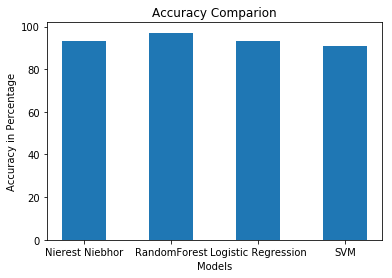

In [16]:
#Complete comparison between all the models 
models = ('Nierest Niebhor', 'RandomForest', 'Logistic Regression', 'SVM')
Acc = (NN_Acc,Rf_Acc,Lr_Acc,SVM2_Acc)
plt.bar(models,Acc,width=0.5)
plt.title('Accuracy Comparion')
plt.xlabel('Models')
plt.ylabel('Accuracy in Percentage')
plt.show()